In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
data=pd.read_csv(r"D:\ML\Amazon Fine Food\Reviews.csv",sep=',')

In [14]:
df=pd.DataFrame(data)
data1 = df[df['Score'] != 3]
data1.loc[data.Score >3,'Score'] = 1
data1.loc[data.Score <3,'Score'] = 0

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
'''
count_Class=pd.value_counts(data1["Score"]==1, sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()
print(count_Class)
'''

'\ncount_Class=pd.value_counts(data1["Score"]==1, sort= True)\ncount_Class.plot(kind= \'bar\', color= ["blue", "orange"])\nplt.title(\'Bar chart\')\nplt.show()\nprint(count_Class)\n'

In [31]:
sort_data = data1.sort_values(by=["ProductId"], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

fields=["UserId","ProfileName","Time","Text","Score"]
sort_by_column = pd.DataFrame(sort_data,columns=fields)
sort_by_column.shape

#show only duplicated data
dup=sort_by_column[sort_data.duplicated(['UserId','ProfileName','Time','Text'])]
dup.shape

#drop duplicates from sorted dataframe
#dup_drop=sort_by_column.drop_duplicates(['Text'],keep='first')
dup_drop=sort_by_column.drop_duplicates(['UserId','ProfileName','Time','Text'],keep='first')
dup_drop.shape

(364173, 5)

In [32]:
import re
from bs4 import BeautifulSoup 
dup_drop

,UserId,ProfileName,Time,Text,Score
150523,ACITT7DI6IDDL,shari zychinski,939340800,this witty little book makes my son laugh at l...,1
150505,A2IW4PEEKO2R0U,Tracy,1194739200,"I grew up reading these Sendak books, and watc...",1
150506,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1191456000,This is a fun way for children to learn their ...,1
150507,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1076025600,This is a great little book to read aloud- it ...,1
150508,A3CMRKGE0P909G,Teresa,1018396800,This is a book of poetry about the months of t...,1
150510,A1C9K534BCI9GO,Laura Purdie Salas,1344211200,"A charming, rhyming book that describes the ci...",1
150511,A1DJXZA5V5FFVA,A. Conway,1338249600,I set aside at least an hour each day to read ...,1
150512,ASH0DZQQF6AIZ,tessarat,1325721600,I remembered this book from my childhood and g...,1
150513,A2ONB6ZA292PA,Rosalind Matzner,1313884800,It's a great book with adorable illustrations....,1
150514,A2RTT81R6Y3R7X,Lindylu,1303171200,This book is a family favorite and was read to...,1


In [33]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [34]:
import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [35]:
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(dup_drop['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████| 364173/364173 [02:21<00:00, 2573.20it/s]


In [36]:
dup_drop.shape

(364173, 5)

In [37]:
dup_drop['Text']=preprocessed_reviews

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
dup_drop.shape

(364173, 5)

In [39]:
Pre_Process_Data = dup_drop[['Text','Score','Time']] 

X_Text=Pre_Process_Data ['Text']
Y_Score =Pre_Process_Data ['Score'] # positive or negative score
print('\nPre_Process_Text_Data  X_Text=',X_Text.shape)
print('\nPre_Process_Score_Data Y_Score=',Y_Score.shape)

# postive and negtive reviews from original datasets of amazon
pos_final = Pre_Process_Data[Pre_Process_Data .Score == 1]# postive reviews
pos_final = pos_final.sample(frac=0.3)
print(pos_final.Score.value_counts())

neg_final = Pre_Process_Data [Pre_Process_Data .Score == 0] # negative reviews
print(neg_final.Score.value_counts())

final_pos_neg = pd.concat([pos_final,neg_final],axis=0)
print(len(final_pos_neg))
print(type(final_pos_neg))


Pre_Process_Text_Data  X_Text= (364173,)

Pre_Process_Score_Data Y_Score= (364173,)
1    92119
Name: Score, dtype: int64
0    57110
Name: Score, dtype: int64
149229
<class 'pandas.core.frame.DataFrame'>


In [60]:
from sklearn.model_selection import train_test_split

X = final_pos_neg[['Text','Time']].sort_values('Time',axis=0).drop('Time',axis=1)
X=X[:40000]
X.shape

Y = final_pos_neg[['Score','Time']].sort_values('Time',axis=0).drop('Time',axis=1)
Y=Y[:40000]
Y.shape

X_train_data,X_test_data,Y_train_data,Y_test_data = train_test_split(X, Y, test_size=0.30,random_state=0)
'''
X_train.shape
X_test.shape
Y_train.shape
Y_test.shape
'''


'\nX_train.shape\nX_test.shape\nY_train.shape\nY_test.shape\n'

In [61]:
models_performence = {
    'Model':[],
    'Vectorizer': [],
    'SearchCV':[],
    'Scoring Metrics': [],
    'Train_model_score': [],
    'Test_model_score': [],
    'best panalty': [],
    'Best lambda':[],
}

columns = ["Model","Vectorizer","SearchCV", "Scoring Metrics","Train_model_score","Test_model_score", "best panalty","Best lambda"]
print(len(columns))
pd.DataFrame(models_performence, columns=columns)

8


,Model,Vectorizer,SearchCV,Scoring Metrics,Train_model_score,Test_model_score,best panalty,Best lambda


In [62]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)

In [63]:
#  lambda_LR is function to calculate the lambda value using'L2' for Logistic Regression
def lambda_LR1(X_train,y_train,X_test, y_test,vectorization):
    #  regularization penalty space
    penalty = ['l2']
    #  regularization hyperparameter distribution using uniform distribution
    C1 = uniform(loc=0, scale=4)
    C = np.logspace(0, 4, 10)
    #  hyperparameter options
    hp1 =dict(C=C, penalty=penalty)
    hp = dict(C=C1, penalty=penalty)
    # Scoring options
    d = ['accuracy','precision','recall','f1'] 
    
    for i in range(len(d)):
        models_performence['Model'].append('Logistic Regression')
        models_performence['Vectorizer'].append(vectorization)
        models_performence['SearchCV'].append('GridSearchCV')
        #print('for GridSearchCV') 
        p = d[i]
        models_performence['Scoring Metrics'].append(p)
        model1 = GridSearchCV(LogisticRegression(), hp1, scoring = p, cv=tscv,n_jobs= -1)
        best_model1=model1.fit(X_train, y_train)
        
        Test_model_score=model1.score(X_test, y_test)
        Train_model_score=model1.score(X_train, y_train)
        models_performence['Train_model_score'].append(Train_model_score.mean())
        models_performence['Test_model_score'].append(Test_model_score.mean())
        
        #Reg1=best_model1.best_estimator_.get_params()['penalty']
       
        models_performence['best panalty'].append('l2')
        optimal_l1=best_model1.best_estimator_.get_params()['C']
        
        models_performence['Best lambda'].append(optimal_l1)
        
        
        
        #print('For RandomsearchCV')
        models_performence['Model'].append('Logistic Regression')
        models_performence['Vectorizer'].append(vectorization)
        
        models_performence['SearchCV'].append('RandomsearchCV')
        
        model2 = RandomizedSearchCV(LogisticRegression(),hp,scoring = p, cv=tscv,n_jobs= -1)
        # Fit randomized search
        best_model2 = model2.fit(X_train,y_train)
        
        models_performence['Scoring Metrics'].append(p)
        #print(model2.best_estimator_)
        Test_model_score2=model2.score(X_test, y_test)
        Train_model_score=model2.score(X_train, y_train)
        models_performence['Train_model_score'].append(Train_model_score.mean())
       
        models_performence['Test_model_score'].append(Test_model_score2.mean())
        #Reg2=best_model2.best_estimator_.get_params()['penalty']
        
        models_performence['best panalty'].append('l2')
        optimal_l2=best_model2.best_estimator_.get_params()['C']
       
        
        models_performence['Best lambda'].append(optimal_l2)

In [64]:
# result_display  is function to convert dataframe into table format in Markdown
def result_display(df):
    writer = pytablewriter.MarkdownTableWriter()
    #writer.table_name = name
    writer.header_list = list(df.columns.values)
    writer.value_matrix = df.values.tolist()
    writer.write_table()

In [83]:

# All necessary module
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#import  sys
import re
import math
import sqlite3
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#import pytablewriter

from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

# modules for text processing
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

#import scikitplot.metrics as skplt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer


# knn modules
# train-split data,accuracy-score,cross-validation modules

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from collections import Counter
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

count_vect = CountVectorizer()

In [100]:
#vector of train data
data = count_vect.fit_transform(X_train_data.values.astype('U').ravel())
data.get_shape()

final_data = StandardScaler(with_mean=False).fit_transform(data )
print(final_data.shape)

(28000, 32719)


In [68]:
final_data1=count_vect.transform(X_test_data.values.ravel())
#print(final_data1)
final_data_test = StandardScaler(with_mean=False).fit_transform(final_data1)
print(final_data_test.shape)

(12000, 32719)


In [69]:
Train_data=Y_train_data
print(Train_data.shape)

(28000, 1)


In [70]:
# To get optimal lambda using BOW

vectorization='BOW'
optimal_lambda = lambda_LR1(final_data ,Train_data,final_data_test,Y_test_data,vectorization )

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
columns = ["Model","Vectorizer","SearchCV", "Scoring Metrics","Train_model_score", "Test_model_score", "best panalty","Best lambda"]
print(len(columns))
df=pd.DataFrame(models_performence, columns=columns)

8


In [72]:
df=pd.DataFrame(models_performence, columns=columns)
zx=df[df['best panalty'] == 'l2']
zx=zx[zx['SearchCV']=='GridSearchCV']
zx= zx.ix[zx['Test_model_score'].idxmax()]
print(zx)
lambdax=zx['Best lambda']

best_panalty=zx['best panalty']

Scoring_Metrics =zx['Scoring Metrics']
SearchCV=zx['SearchCV']
#print(SearchCV)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


Model                Logistic Regression
Vectorizer                           BOW
SearchCV                    GridSearchCV
Scoring Metrics                   recall
Train_model_score                      1
Test_model_score                0.871484
best panalty                          l2
Best lambda                            1
Name: 4, dtype: object


In [84]:
#Best lambda and best penalty
hp1=dict(C=[lambdax], penalty=[best_panalty])
LR =GridSearchCV(LogisticRegression(), hp1, scoring =Scoring_Metrics, cv=tscv)
LR.fit(final_data ,Train_data)

prediction1 = LR.predict(final_data_test)

In [85]:
#Training accuracy and training error
training_score=LR.score(final_data,Train_data)
print('training accuracy=',training_score)
training_error=1-training_score
print('training error is =',training_error)

training accuracy= 1.0
training error is = 0.0


In [86]:

# Testing Accuracy and testing error for LogisticRegression model

Testing_score=round(accuracy_score(Y_test_data ,prediction1),5)
print("Accuracy for Logistic Regression model with Bag of words is = ",Testing_score)
Testing_error=1-Testing_score
print("Testing error for Logistic Regression model with Bag of words is = ",Testing_error)

Accuracy for Logistic Regression model with Bag of words is =  0.82183
Testing error for Logistic Regression model with Bag of words is =  0.17817000000000005


In [87]:
F1_score = round(f1_score(Y_test_data ,prediction1,average='macro'),5)*100
recall = round(recall_score(Y_test_data,prediction1,average='macro'),5)*100
precision = round(precision_score(Y_test_data ,prediction1,average='macro'),5)*100

In [88]:
print(classification_report( Y_test_data,prediction1))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      3822
           1       0.87      0.87      0.87      8178

   micro avg       0.82      0.82      0.82     12000
   macro avg       0.80      0.79      0.79     12000
weighted avg       0.82      0.82      0.82     12000



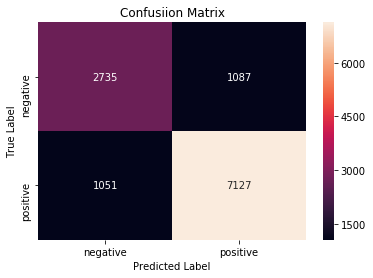

In [89]:
import seaborn as sns
cm = confusion_matrix(Y_test_data ,prediction1)
label = ['negative', 'positive']
df_conf = pd.DataFrame(cm, index = label, columns = label)
sns.heatmap(df_conf, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [133]:


models_performence = {
    'Model':['Logistic Regression'],   
    'Vectorizer': ['BoW'],
    'SearchCV':[SearchCV],
    'Best penalty':[best_panalty],
    'Optimal lambda': [lambdax],
    'Training error':[training_error*100],
    'Test error':[Testing_error*100],
    'Accuracy':[Testing_score],
    'F1':[F1_score],
    'recall':[recall],
    'precision':[precision]
    
  
}

In [91]:

columns = ["Model","Vectorizer","SearchCV", "Best penalty","Optimal lambda", "Training error",  "Test error",
            "Accuracy","F1","recall","precision",
          ]
df1=pd.DataFrame(models_performence1, columns=columns)

In [93]:
#result_display(df1)

In [94]:
model = LogisticRegression( random_state=0, class_weight='balanced')
model.fit(final_data ,Train_data)
# Calculate feature importances
count_vect_feature=count_vect.get_feature_names()
feature_importance = model.coef_[0]
print(feature_importance)

[ 6.43183695e-03  3.56826748e-03  1.36388374e-02 ...  3.28387050e-03
 -2.76307934e-05 -2.76321369e-02]


In [99]:
#print('pedfjhlfiuvhb oif')

In [96]:
Negative_Feature_Importance= feature_importance[-15:]
print('Negative_Feature_Importanc',Negative_Feature_Importance)
Positive_Feature_Importance= feature_importance[:15]
print('Positive_Feature_Importance',Positive_Feature_Importance)

Negative_Feature_Importanc [ 3.58867891e-04  5.79836729e-02  1.04570391e-01 -3.38022673e-03
  2.09581831e-03  1.52387233e-01 -4.93592736e-02  6.63310304e-03
 -6.83315087e-05 -9.42814516e-02 -1.15754414e-04  1.35922285e-02
  3.28387050e-03 -2.76307934e-05 -2.76321369e-02]
Positive_Feature_Importance [ 6.43183695e-03  3.56826748e-03  1.36388374e-02 -4.06765959e-02
  1.91544395e-03 -1.70598609e-04 -2.37031234e-04 -7.84988561e-05
 -2.24389214e-05 -1.16589144e-02  5.40924997e-02 -4.28191475e-02
  4.24557267e-02  4.40314680e-03  2.72830559e-02]


Top 15 negative class feature dried            -0.689948
would            -0.691985
taste            -0.698806
stale            -0.709493
varieties        -0.712210
horrible         -0.723399
horseradish      -0.745944
way              -0.763115
disappointment   -0.779979
terrible         -0.794835
unfortunately    -0.795154
disappointed     -0.832802
people           -0.859457
worst            -1.056956
not              -2.718783
dtype: float64


Text(0, 0.5, 'Relative Feature Importance for Negative class ')

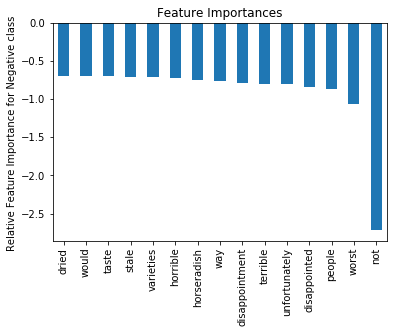

In [97]:
# Relative Feature Importance for Negative class using BOW
feat_imp = pd.Series(feature_importance, count_vect_feature).sort_values(ascending=False)
print("Top 15 negative class feature",feat_imp[-15:])

feat_imp[-15:].plot(kind='bar', title='Feature Importances')
plt.ylabel('Relative Feature Importance for Negative class ')

Top 15 postive class feature great          2.191012
best           1.578720
favorite       1.400438
love           1.256209
perfect        1.160553
delicious      1.130964
good           1.061917
excellent      1.013605
loves          0.969123
find           0.964815
yummy          0.867190
awesome        0.852325
wonderful      0.771319
body           0.756662
recommended    0.745634
dtype: float64


Text(0, 0.5, 'Relative Feature Importance for Postive class ')

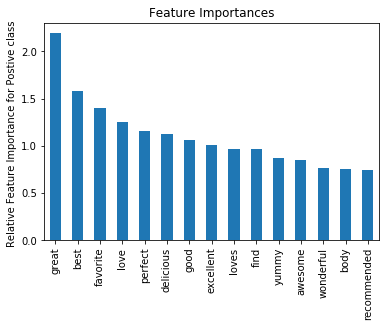

In [98]:
#Feature Importances for postive class using count_vect

feat_imp = pd.Series(feature_importance, count_vect_feature).sort_values(ascending=False)
print("Top 15 postive class feature",feat_imp[:15])

feat_imp[:15].plot(kind='bar', title='Feature Importances')
plt.ylabel('Relative Feature Importance for Postive class ')

In [134]:
models_performence1 = {
    'Model':[],
    'Vectorizer': [],
    'SearchCV':[],
    'Scoring Metrics': [],
    'Train_model_score': [],
    'Test_model_score': [],
    'best panalty': [],
    'Best lambda':[],
}

columns = ["Model","Vectorizer","SearchCV", "Scoring Metrics","Train_model_score","Test_model_score", "best panalty","Best lambda"]
pd.DataFrame(models_performence, columns=columns)

,Model,Vectorizer,SearchCV,Scoring Metrics,Train_model_score,Test_model_score,best panalty,Best lambda
0,Logistic Regression,BoW,GridSearchCV,NaN,NaN,NaN,NaN,NaN


In [140]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(X_train_data.values.astype('U').ravel())
final_tf_idf.get_shape()
features = tf_idf_vect.get_feature_names()
len(features)
final_tfidf_np = StandardScaler(with_mean=False).fit_transform(final_tf_idf )

590422

In [130]:
final_tf_idf_test = tf_idf_vect.transform(X_test_data.values.astype('U').ravel())
final_tf_idf_test.get_shape()
final_tfidf_np_test = StandardScaler(with_mean=False).fit_transform(final_tf_idf_test )

(12000, 590422)

In [132]:
vectorization='TF-IDF'
optimal_lambda = lambda_LR1(final_tfidf_np ,Train_data,final_tfidf_np_test,Y_test_data,vectorization)

In [143]:
columns = ["Model","Vectorizer","SearchCV", "Scoring Metrics","Train_model_score","Test_model_score", "best panalty","Best lambda"]
df6=pd.DataFrame(models_performence, columns=columns)


In [146]:
#L2 regularization

zx=df6[df6['best panalty'] == 'l2']
zx=df6[df6['Vectorizer'] == 'TF-IDF']
zx=zx[zx['SearchCV']=='RandomsearchCV']
zx= zx.ix[zx['Test_model_score']]
print(zx)
lambdax=zx['Best lambda']

best_panalty=zx['best panalty']

Scoring_Metrics =zx['Scoring Metrics']
SearchCV=zx['SearchCV']

Empty DataFrame
Columns: [Model, Vectorizer, SearchCV, Scoring Metrics, Train_model_score, Test_model_score, best panalty, Best lambda]
Index: []


In [160]:
#Best lambda and best penalty
C1 = uniform(loc=0, scale=lambdax)
hp5=dict(C=C1, penalty=[best_panalty])
LR5 = RandomizedSearchCV(LogisticRegression(), hp5, scoring =Scoring_Metrics, cv=tscv)
LR5.fit(final_data ,Train_data)

prediction5 = LR5.predict(final_data_test)
lambda_new=LR5.best_params_['C']

ValueError: scoring should either be a single string or callable for single metric evaluation or a list/tuple of strings or a dict of scorer name mapped to the callable for multiple metric evaluation. Got Series([], Name: Scoring Metrics, dtype: object) of type <class 'pandas.core.series.Series'>

In [161]:
#Training accuracy and training error
training_score=LR5.score(final_data,Train_data)
print('training accuracy=',training_score)
training_error=1-training_score
print('training error is =',training_error)


NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
# Testing Accuracy and testing error for knn model

Testing_score=round(accuracy_score(Y_test_data ,prediction5),5)
print("Accuracy for Logistic Regression model with TF_IDF is = ",Testing_score)
Testing_error=1-Testing_score
print("Testing error for Logistic Regression model with TFIDF is = ",Testing_error)

In [ ]:
F1_score = round(f1_score(Y_test_data ,prediction5,average='macro'),5)*100
recall = round(recall_score(Y_test_data,prediction5,average='macro'),5)*100
precision = round(precision_score(Y_test_data ,prediction5,average='macro'),5)*100

In [ ]:
print(classification_report( Y_test_data,prediction5))

In [ ]:
cm = confusion_matrix(Y_test_data ,prediction5)
label = ['negative', 'positive']
df_conf = pd.DataFrame(cm, index = label, columns = label)
sns.heatmap(df_conf, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
model = LogisticRegression(random_state=0, class_weight='balanced')
model.fit(final_tfidf_np ,Train_data)
tf_idf_feature=tf_idf_vect .get_feature_names()
feature_importance = model.coef_[0]
print(feature_importance)